In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Mouna\\OneDrive\\Pictures\\Desktop\\remade.csv")


df1 = df.copy(deep=True)
df1 = df1.drop(['the_geom','the_geom_webmercator','cartodb_id','rw_country_code','rw_country_name','country',
                'cri_rank','fatalities_per_100k_rank','fatalities_rank','losses_per_gdp__rank','losses_usdm_ppp_rank','world_label'],axis=1)

df1["losses_per_gdp__total"].fillna(0,inplace=True)

X = df1.iloc[:,2: ]
y = df1.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rreg = RandomForestRegressor(n_estimators=20)


rreg.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=20)

In [3]:
y_pred = rreg.predict(X_test_scaled)
print(y_pred)

[ 59.449   72.893   79.692  113.707   81.274   61.2085  79.785   27.0655
  53.399   63.968  124.5    101.2985  97.376  124.5    124.5    124.5
 124.5    103.5065  37.658   70.609  124.5     79.7085  86.116   87.9905
  62.5915 112.7065 124.5     30.8335  47.516   97.333   95.919   92.761
  51.0585 124.5     43.6895  65.625   98.8745]


In [4]:
ms_score = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(np.sqrt(ms_score))
print(np.sqrt(r2))

4.794512057015279
0.9873985653893931


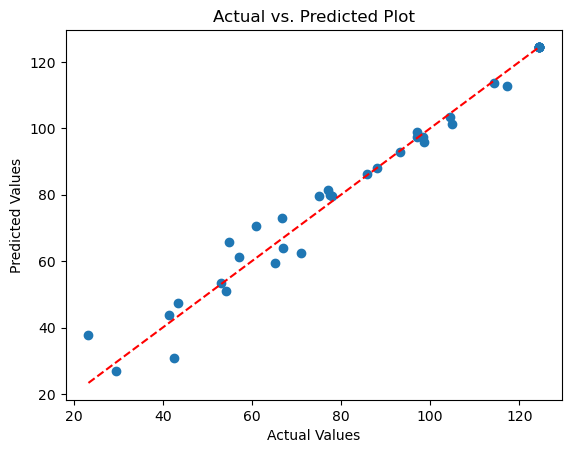

In [5]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.show()